# General Process

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

drive.mount('/content/drive')
myFiles = '/content/drive/MyDrive/Colab Notebooks/cust_seg.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Sebuah bank melakukan uji coba terhadap campaign yang dilakukan apakah sukses dalam hal penggunaan kartu kredit dan apakah ada perbedaan penggunaan kartu kredit antara laki-laki dan perempuan

In [ ]:
df = pd.read_csv(myFiles)
df.head()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2


# Exploratory Data Analysits
Lakukan Analisis Eksplorasi Data pada dataset tersebut berikut penjelasan dan visualisasinya

In [ ]:
#Melihat informasi dari setiap kolom
#Setaip row pada kolom semua terisi artinya tidak ada missing value(NaN) 
#custid seharusnya menjadi primary key yang unik
print(f'Jumlah row data :  {df.custid.count()}')
df.info()

Jumlah row data :  200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [ ]:
#cek custid apak unik atau tidak 
#atau apakah ada duplikasi
if df['custid'].count() == df['custid'].nunique():
  print('Kolom custid unik dan tidak ada duplikasi') 
else:
  print('Kolom custid tidak unik atau ada duplikasi') 

Kolom custid unik dan tidak ada duplikasi


In [ ]:
#Mengatur ulang data agar lebih mudah dimengerti dengan mengganti nama masing-masing kolom
df1 = df[['custid','sex','pre_usage','Post_usage_1month','post_usage_2ndmonth','Latest_mon_usage']]
df1.columns = ['ID Customer','Jenis Kelamin','Pemakaian Awal','Pemakaian Bulan 1','Pemakaian Bulan 2','Pemakaian 1 Tahun Lalu']
df1[['ID Customer','Jenis Kelamin','Pemakaian 1 Tahun Lalu','Pemakaian Awal','Pemakaian Bulan 1','Pemakaian Bulan 2']]
df1.head()

,ID Customer,Jenis Kelamin,Pemakaian Awal,Pemakaian Bulan 1,Pemakaian Bulan 2,Pemakaian 1 Tahun Lalu
0,70,0,57,52,57.2,49.2
1,121,1,68,59,64.9,63.6
2,86,0,44,33,36.3,64.8
3,141,0,63,44,48.4,56.4
4,172,0,47,52,57.2,68.4


In [ ]:
# Menghitung rerata pemakaian sebelum dan sesudah campaign
df1.insert(6, column = 'Rerata Setelah Campaign', value = (df1['Pemakaian Bulan 1'] + df1['Pemakaian Bulan 2'])/2)
df1.head()

,ID Customer,Jenis Kelamin,Pemakaian Awal,Pemakaian Bulan 1,Pemakaian Bulan 2,Pemakaian 1 Tahun Lalu,Rerata Setelah Campaign
0,70,0,57,52,57.2,49.2,54.60
1,121,1,68,59,64.9,63.6,61.95
2,86,0,44,33,36.3,64.8,34.65
3,141,0,63,44,48.4,56.4,46.20
4,172,0,47,52,57.2,68.4,54.60


In [ ]:
# Menghitung selisih (difference) rata-rata setelah dan sebelum campaign
selisihRerataPemakaian = df1['Rerata Setelah Campaign'] - df1['Pemakaian Awal']
df1.insert(7, column = 'Selisih Rerata', value = selisihRerataPemakaian)
rerataSelisihPemakaian = df1['Selisih Rerata'].mean()
print(f'Rata-rata selisih pemakaian sebelum dan sesudah campaign adalah sebesar {rerataSelisihPemakaian:.3f}')

Rata-rata selisih pemakaian sebelum dan sesudah campaign adalah sebesar 3.184


In [ ]:
#Membandingkan rata-rata pemakaian sebelum dan sesudah adanya campaign
tempRerata = pd.DataFrame({'Rerata Pemakaian' : df1[['Pemakaian Awal','Rerata Setelah Campaign']].mean()})
tempRerata

,Rerata Pemakaian
Pemakaian Awal,52.23000
Rerata Setelah Campaign,55.41375


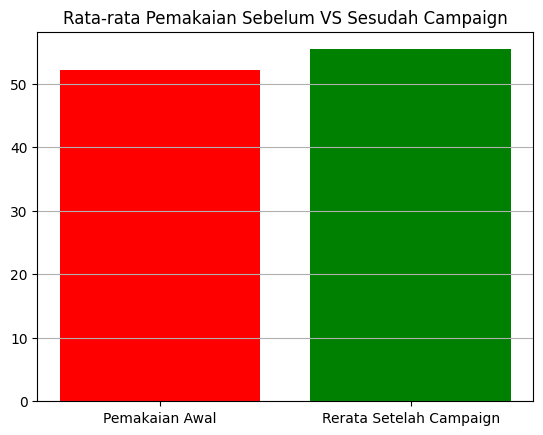

In [ ]:
#menampilkan visualisasi 
plt.title('Rata-rata Pemakaian Sebelum VS Sesudah Campaign')
plt.bar(tempRerata.index,tempRerata['Rerata Pemakaian'], color=['red', 'green'])
plt.grid(axis='y')

Dari diagram batang diatas dapat dilihat :
Rata2 Pemakaian Sebelum campaign < Rata2 Pemakaian Setelah Campaign.
Artinya ***campaign berpengaruh*** terhadap kenaikan pemakaian kartu kredit, Mengalami kenaikan pemakaian sebesar 3.184.
Kesimpulannya secara keseluruhan ***campaign sukses***

# **Adakah Perbedaan Pemakaian laki-laki vs perempuan**

In [ ]:
#Membuat kategori laki-laki dan perempuan
gender= df1['Jenis Kelamin'].replace([0, 1], ['Laki-laki', 'Perempuan'])
df1.insert(2, column = 'Gender', value = gender)
#Melihat perbandingan jumlah laki-laki dan perempuan
pd.DataFrame(df1['Gender'].value_counts())

,Gender
Perempuan,109
Laki-laki,91


Perbandingan pengguna kartu kredit laki-laki lebih sedikit dibandingkan perempuan

In [ ]:
# Melihat Rerata Pemakaian Sebelum dan Sesudah Campaign antara Laki-laki Vs Perempuan
df2 =df1.groupby(['Gender'])[['Pemakaian Awal','Rerata Setelah Campaign']].mean()
df2

,Pemakaian Awal,Rerata Setelah Campaign
Gender,,
Laki-laki,52.824176,52.626923
Perempuan,51.733945,57.740367


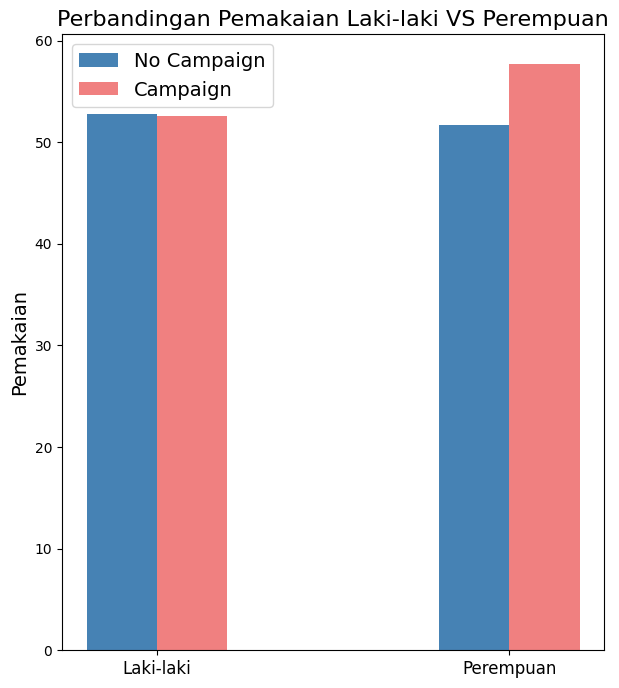

In [ ]:
# Menampilkan visualisasi
x = np.arange(len(df2.index))
width = 0.2

fig, ax = plt.subplots(figsize=(7, 8))

ax.bar(x - width/2, df2['Pemakaian Awal'], width, label='No Campaign', color='steelblue')
ax.bar(x + width/2, df2['Rerata Setelah Campaign'], width, label='Campaign', color='lightcoral')

ax.set_title('Perbandingan Pemakaian Laki-laki VS Perempuan', size=16)
ax.set_ylabel('Pemakaian', size=14)
ax.set_xticks(x)
ax.set_xticklabels(df2.index, size=12)
ax.legend(fontsize=14)

plt.show()

# Kesimpulan

Hasil explorasi data:
1. Perbandingan pengguna kartu kredit : laki-laki (91) < (109) perempuan
2. Rerata pemakaian kartu kredit sebelum campaign :
   Laki-laki (52.824176) > (51.733945) Perempuan.
3. Rerata pemakaian kartu kredit setelah campaign :
   Laki-laki (52.626923) < (57.740367) Perempuan.
4. Rerata pemakaian kartu kredit oleh laki-laki :
   setelah campaign (52.626923) > (52.626923) sebelum campaign.
5. Rerata pemakaian kartu kredit oleh perempuan :
   setelah campaign (51.733945) < (57.303670) sebelum campaign

Kesimpulan :

* Terdapat perbedaan yang signifikan pemakaian kartu kredit antara laki-laki dan perempuan. 
* Campaign yang dilakukan sangat berpengaruh terhadap pemakaian kartu kredit dikalangan Perempuan, dengan rerata kenaikan sebesar 6,006422 .
* Berbeda dengan laki-laki, campaign yang dilakukan tidak terlalu berpengaruh terhadap pemakian kartu bahkan hampir sama. 
* Secara general bisa dikatakan campaign ini sukses. 
* Campaign tersebut sangat terasa dampaknya untuk kalangan perempuan.



# Uji Hipotesis

# Campaign yang dilakukan apakah sukses dalam hal penggunaan kartu kredit

Prosedur melakukan uji Hipotesis.



1.Merumuskan hipotesis nol (H0)
dan hipotesis alternatif (H1)

H0 --> Rata-rata pemakaian kartu kredit setelah campaign = rata-rata pemakaian kartu kredit sebelum campaign. (µ1 = µ0)

H1 --> Rata-rata pemakaian kartu kredit setelah campaign ≠ rata-rata pemakaian kartu kredit sebelum campaign (µ1 > µ0)

2.Menetapkan tingkat signifikansi (α)
yang digunakan.

Tingkat signifikansi (α) = 5% atau 0.05, dengan tingkat kepercayaan 95% atau 0.95.

Karena H1 --> µ1 ≠ µ0, maka digunakan hipotesis 2 arah atau Two Tailed. Sehingga daerah kritis menjadi dau di kiri dan kanan dengan nilai (α) menjadi = 0.025

Menentukan area kritis penolakan H0

Nilai poin kritis adalah -1.95996


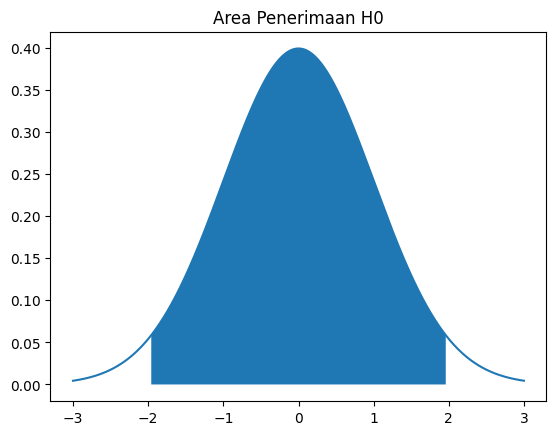

In [ ]:
# Menentukan poin kritis
poin_kritis = stats.norm.ppf(0.025)
print(f'Nilai poin kritis adalah {poin_kritis:.5f}')

# Menggambar Area Kritis atau Area Penolakan H0 dengan (α) = 5%
# Karena Two taild berarti nilai (α) = 0.025 dikanan dan (α) =-0.025 di kiri

def draw_z_score(x, cond, mu=0, sigma=1):
    y = stats.norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, stats.norm.pdf(z, mu, sigma))
    plt.title('Area Penerimaan H0')
    plt.show()
    
x = np.arange(-3, 3, 0.001)
draw_z_score(x, ( x > poin_kritis) & (x < abs(poin_kritis)))
#Area diluar yang berwarna biru adalah area penolakan


Area Yg berwarna biru adalah daerah penerimaan H0, dan diluar itu adalah area penolkan HO..Garis batasnya ada lah poin kritis pada kasus ini untuk two tailed dengan  (α) = 5% atau 0.05 besar poin kritisnya -1.95996 di kiri dan 1.95996 dikanan.

###############################################################################################

3.Menentukan statistik uji yang tepat dan
menghitung nilai statistik hitung.

Karena data sampel yang digunakan adalah dua sampel berpasangan atau dependen (ke dua data sampel merupakan data populasi yang sama namun berbeda perlakuan, dimana yang 1 disebut control dan lainnya disebut treatment), dan jumlah sampel data (n) > 30, maka uji hipotesis bisa dilakukan dengan Uji Z Dua Sampel Berpasangan (tapi cara ini tidak familiar).

Untuk dua sampel berpasangan Uji T lebih di kenal walaupun biasanya uji T dilakukan untuk sampel yang jumlah datanya (n) < 30, tetapi pada data yang berpasangan untuk n > 30 nilai T lebih akurat atau sebanding dengan nilai Z. Sehingga untuk data dua sampel berpasangan lebih dikenal dengan Uji T Dua Sampel berpasangan (Paired T-Test). Jadi kita akan melakukan uji hipotesis menggunakan Paired T-Test.

Dengan rumus

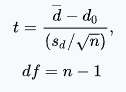

Dimana 

       t  : Nilai T hitung

       d  : Rata-rata selisih ke dua sampel

       Sd : Standard Deviasi Selisih

       n  : Jumlah sampel

       df : derajat kebebasan

Syarat bisa dilakukan paired T-test
*   Selisih rata2 sampel harus tedistribusi normal



Melakukan pengecekan apakah rata-rata selisih sampel terdistribusi normal

<Axes: xlabel='Selisih Rerata', ylabel='Density'>

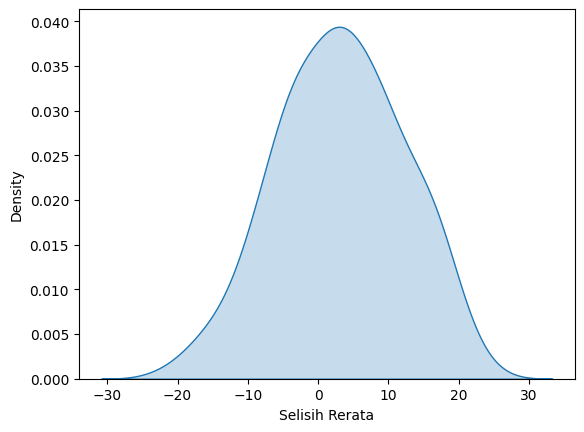

In [ ]:
# cek apakah selisih rata2 sampel terdistribusi normal
# menggunakan KDE (Kernel Density Estimation)
sns.kdeplot(df1['Selisih Rerata'], fill=True)

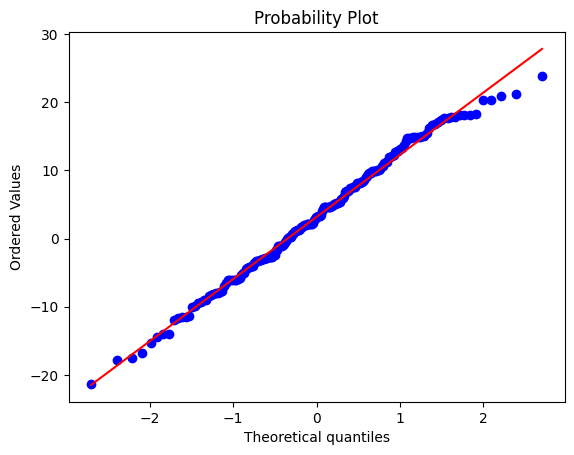

In [ ]:
# Cek sampel terdistribusi normal menggunakan Probabilitic plot 
# (analisis regresi untuk pemeriksaan asumsi normalitas)
stats.probplot(df1['Selisih Rerata'],plot=plt);

Dilihat dari hasil diagram pertama diatas yang berbentuk lonceng, menunjukkan bahwa selisih rata-rata ke dua data terdistribusi normal. Dan untuk diagram ke dua metode probabilistic plot, bisa dilihat data terkumpul di garis merah menandakan data terdistribusi normal. 

Karena rata2 selisih sampel berdistribusi normal maka Paired Z-Test bisa dilakukan.

Melakukan Uji Z Dua sampel berpasangan (Paired Z-Test/ Paired T-Test) secara manual

In [ ]:
# Melakukan Uji Dua sampel berpasangan (Paired Z-Test/ Paired T-Test) secara manual
# Dimana rumus nya seperti diatas pada poin 3

d = df1['Selisih Rerata'].mean()
d0 = 0 #karena uji H0 adalah pembuktian jika rata2 sebelum dan sesudah adalah sama atau berarti selisih nya adalah nol
Sd = df1['Selisih Rerata'].std()
n = df1['Selisih Rerata'].count()

# Hitung nilai T statistik
tstat = (d - d0)/(Sd/n**0.5)
print(f'Nilai T Statistik adalah {tstat:.5f}')
print(f'Nilai Poin Kritis adalah {poin_kritis:.5f}')

#Kondisi untuk Two Tailed
if tstat > abs(poin_kritis) or tstat < poin_kritis :
    print('Hipotesis Nol (H0) DITOLAK')
else :
    print('Hipotesis Nol (H0) DITERIMA') 

Nilai T Statistik adalah 4.96064
Nilai Poin Kritis adalah -1.95996
Hipotesis Nol (H0) DITOLAK


Menggunakan perhitungan manual didapat hasil Nilai T Statistik adalah 4.96064
dimana Nilai Poin Kritis adalah -1.95996 dan 1.95996. 

Jika Tstat > 1.95996 atau T stat < -1.95996 maka Hipotesis Nol (H0) ditolak.

Karena T statistik > Nilai poin kritis artinya nilai T berada di area penolkan H0, artinya Hipotesis Nol (H0) DITOLAK.

**----------------------------------------------------------------------------**

Melakukan Uji Z Dua sampel berpasangan (Paired Z-Test/ Paired T-Test) menggunakan scipy

In [ ]:
nawal = df1['Pemakaian Awal']
ncamp = df1['Rerata Setelah Campaign']
tstat, pvalue= stats.ttest_rel(ncamp,nawal,alternative='two-sided')
print(f't-statistic : {tstat:.5f}')
print(f'p-value : {pvalue:.5f}')

t-statistic : 4.96064
p-value : 0.00000


Kesimpulan

1.   Nilai P-Value (0.00000) < 0.025 (α), Artinya Hipotesis Nol (H0) ditolak, Dan Hipotesis alternatif diterima.
     

2. Karena Hipotesis alternatif diterima artinya ada perbedaan terhadap pemakaian kartu setelah diadakan campaign.

3. Karena nilai T statisik (4.96064) berada di area kritis sebelah kanan, artinya pengaruh campaign ini memberikan efek yang Positif dengan kata lain **CAMPAIGN SUKSES** karena membuat kenaikan pemakaian pengguna kartu.




##################################################################################

# Uji Hipotests Adakah perbedaan pemakaian laki-laki dan perempuan 

Mengecek Perbedaan pemakaian antara laki-laki dan perempuan menggunakan uji hipotesis

1.Merumuskan hipotesis nol (H0)
dan hipotesis alternatif (H1)

H0 --> Tidak ada perbedaan pemakaian antara kartu kredit laki-laki dan perempuan

H1 --> Ada perbedaan pemakaian antara kartu kredit laki-laki dan perempuan

2.Menetapkan tingkat signifikansi (α) yang digunakan.

Tingkat signifikansi (α) = 5% atau 0.05, dengan tingkat kepercayaan 95% atau 0.95.

Karena H1 --> µ1 ≠ µ0, maka digunakan hipotesis 2 arah atau Two Tailed. Sehingga daerah kritis menjadi dau di kiri dan kanan dengan nilai (α) menjadi = 0.025

3.Menentukan statistik uji yang tepat dan menghitung nilai statistik hitung.

Karena laki-laki dan perempuan adalah proporsi dari suatu populasi. Untuk menghtiung pemakaian pun menggunakan proporsi. Sehingga digunkan uji hipotesis proporsi

Melakukan Uji Z Proporsi 2 Populasi menggunakan statsmodels 

In [ ]:
# Melakukan mapping tingkat kesuksesan campaign dimana dianggap sukses (1) jika rata-rata selisih pemakaian > 0 dan 0 jika rata-rata selisih <= 0
df1.insert(8, column = 'Success', value = (df1['Selisih Rerata'].apply(lambda x : 0 if x <= 0 else 1)))

In [ ]:
# Melakukan uji hipotesis
male = df1[df1['Gender'] == 'Laki-laki']['Success'] 
female = df1[df1['Gender'] == 'Perempuan']['Success'] 
nmale = male.count()
nfemale = female.count()
successes = [male.sum(),female.sum()]
nobs = [nmale,nfemale]
z_stat,pval = proportions_ztest(successes,nobs)
#(lower_con,lower_treat),(upper_con,upper_treat) = proportion_confint(successes,nobs=nobs,alpha=0.05)

print(nmale,nfemale,successes)
print(f'z-statistic : {z_stat:.2f}')
print(f'p-value : {pval:.5f}')

91 109 [45, 82]
z-statistic : -3.77
p-value : 0.00016


Kesimpulan:

*   Nilai P-value (0.00016) < (α) = 0.05, berarti H0 ditolak.
*   Karena H0 ditolak maka Hipotesis Alternatif (H1) diterima. Artinya 'Ada perbedaan pemakaian antara kartu kredit laki-laki dan perempuan' adalah bernilai benar.




# Uji Statistik Pemakaian Kartu Kredit Laki-laki setelah dan sebelum Campaign
 
 menggunakan Paired T-Test dengan  (α) = 5%. Maka poin kritis terdapat di kiri kanan dengan poin kritis kiri -1.95996 dan kanan 1.95996


H0 --> Pemakaian Setelah Campaign = Pemakaian Sebelum Campaign

H1 --> Pemakaian Setelah Campaign = Pemakaian Sebelum Campaign

In [ ]:
after_campaign_male = df1[df1['Gender'] == 'Laki-laki']['Rerata Setelah Campaign']
before_campaign_male = df1[df1['Gender'] == 'Laki-laki']['Pemakaian Awal']
tstatl, pvaluel= stats.ttest_rel(after_campaign_male,before_campaign_male,alternative='two-sided')
print(f't-statistic : {tstatl:.5f}')
print(f'p-value : {pvaluel:.9f}')

t-statistic : -0.21034
p-value : 0.833880137


Karena p-value > α, maka HO diterima, artinya H0 diterima atau pemakaian setelah campaign tidak jauh berbeda dengan pemakaian sebelum campaign. 

Karena T Statistik (-0.21034) > Poin Kritis kiri (-1.95996) dan T Statistik (-0.21034) < Poin Kritis kanan (1.95996) maka t statistik berada di area penerimaan H0 dengan kata lain H0 diterima atau tidak ada efek setelah dilakukan efek dikalangan laki-laki.

# Uji Statistik Pemakaian Kartu Kredit Perempuan setelah dan sebelum Campaign

Menggunakan Paired T-Test dengan (α) = 5%. Maka poin kritis terdapat di kiri kanan dengan poin kritis kiri -1.95996 dan kanan 1.95996

H0 --> Pemakaian Setelah Campaign = Pemakaian Sebelum Campaign

H1 --> Pemakaian Setelah Campaign = Pemakaian Sebelum Campaign

In [ ]:
after_campaign_female = df1[df1['Gender'] == 'Perempuan']['Rerata Setelah Campaign']
before_campaign_female = df1[df1['Gender'] == 'Perempuan']['Pemakaian Awal']
tstatp, pvaluep= stats.ttest_rel(after_campaign_female,before_campaign_female,alternative='two-sided')
print(f't-statistic : {tstatp:.5f}')
print(f'p-value : {pvaluep:.9f}')

t-statistic : 7.63656
p-value : 0.000000000


Kesimpulan :

Karena p-value (0.000000000) < α(0.05), maka HO ditolak, artinya terdapat perbedaan pemakaian setelah dan sebelum campaign pada perempuan.

Karena T Statistik (7.63656) > Poin Kritis kanan (1.95996) maka t statistik berada di area penolakan H0 dengan kata lain H1 diterima atau mempunyai efek Positif setelah diadakan campaign dikalangan perempuan.


########################################################

# KESIMPULAN

1. Analisis eksplorasi data yang menyatakan Campaign **Sukses** bisa diperkuat dengan uji hipotesis.
2. Antara analisa data Perbedaan pemakaian laki-laki dan perempuan bisa diperkuat hasilnya menggunakan uji hipotesis dimana hasilnya 'ADA PERBEDAAN PEMAKAIAN ANTARA LAKI-LAKI DAN PEREMPUAN'
3. Campaign sangat berpengaruh di kalangan perempuan, sebaiknya ke depannya diperhatikan isi campaign yang lebih menarik bagi kalangan laki-laki.